# Описание проекта
---
Сервис по продаже автомобилей с пробегом ***«Не бит, не крашен»*** разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля.  
Необходимо построить модель, которая умеет её определять. В нашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.  

#### Критерии, которые важны заказчику:  

- качество предсказания  

- время обучения модели  

- время предсказания модели

## Описание данных

Признаки: 

- **`DateCrawled`** — дата скачивания анкеты из базы
- **`VehicleType`** — тип автомобильного кузова
- **`RegistrationYear`** — год регистрации автомобиля
- **`Gearbox`** — тип коробки передач
- **`Power`** — мощность (л. с.)
- **`Model`** — модель автомобиля
- **`Kilometer`** — пробег (км)
- **`RegistrationMonth`** — месяц регистрации автомобиля
- **`FuelType`** — тип топлива
- **`Brand`** — марка автомобиля
- **`Repaired`** — была машина в ремонте или нет
- **`DateCreated`** — дата создания анкеты
- **`NumberOfPictures`** — количество фотографий автомобиля
- **`PostalCode`** — почтовый индекс владельца анкеты (пользователя)
- **`LastSeen`** — дата последней активности пользователя  

Целевой признак:  

- **`Price`** — цена (евро)

# Выполнение проекта
---

### Содержание:  
<font size=4><ol>
<li>Получение и первичный анализ данных
    <ul>
        <li>1.1. Получение и осмотр данных</li>
        <li>1.2. Предобработка и разведочный анализ данных</li>
    </ul>
</li>
<li>Обучение модели
    <ul>
        <li>2.1. Подготовка признаков</li>
        <li>2.2. Поиск оптимальной модели линейной регрессии</li>
        <li>2.3. Проверка оптимальной модели на тестовых данных</li>
    </ul>
</li>
<li>Выводы</li>
</ol></font>

---

### 1. Получение и первичный анализ данных  

#### 1.1. Получение и осмотр данных  

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

Получим данные для анализа

In [2]:
df = pd.read_csv('/datasets/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])

In [3]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26


Проверим наличие дублкатов

In [4]:
df.duplicated().sum()

4

Удалим дубликаты

In [5]:
df = df.drop_duplicates(ignore_index=True)

Проверим типы данных и пропуски

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354365 entries, 0 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354365 non-null  datetime64[ns]
 1   Price              354365 non-null  int64         
 2   VehicleType        316875 non-null  object        
 3   RegistrationYear   354365 non-null  int64         
 4   Gearbox            334532 non-null  object        
 5   Power              354365 non-null  int64         
 6   Model              334660 non-null  object        
 7   Kilometer          354365 non-null  int64         
 8   RegistrationMonth  354365 non-null  int64         
 9   FuelType           321470 non-null  object        
 10  Brand              354365 non-null  object        
 11  Repaired           283211 non-null  object        
 12  DateCreated        354365 non-null  datetime64[ns]
 13  NumberOfPictures   354365 non-null  int64   

В данных есть пропуски и столбцы с лишней информацией, такие как почтовый индекс или количество фотографий, которые не влияют на цену. Познакомимся с ними поближе. Наиболее важны количественные значения.

#### 1.2. Предобработка и разведочный анализ данных

Может влиять на цену время, прошедшее с регистрации авто и до его выставления на продажу. Попробуем посчитать его в месяцах.

In [7]:
df.groupby('RegistrationMonth', as_index=False).agg(rows=('DateCrawled', 'count'))

,RegistrationMonth,rows
0,0,37352
1,1,23218
2,2,21267
3,3,34373
4,4,29270
5,5,29153
6,6,31507
7,7,27211
8,8,22627
9,9,23813


Много значений с нулевым месяцем. Не очень понятно что это значит - 1-й месяц? 12-й месяц? неизвестный месяц? Не пойдёт.  
Попробуем взять разницу в годах, посмотрим какие самые поздние и ранние у нас есть.

In [8]:
df.groupby('RegistrationYear', as_index=False)\
  .agg(rows=('DateCrawled', 'count'))\
  .sort_values('RegistrationYear', ascending=False).head(20)

,RegistrationYear,rows
150,9999,26
149,9996,1
148,9450,1
147,9229,1
146,9000,3
145,8888,1
144,8500,1
143,8455,1
142,8200,1
141,8000,2


Любопытно... Тогда попробуем определить "век", чтобы увидеть какое количество есть в разные периоды.

In [9]:
df['century'] = df['RegistrationYear'] // 100
df['century'].value_counts()

/var/folders/hj/zp0j66mx775bmpxc6x_4gy8m0000gn/T/ipykernel_72209/3917371418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['century'] = df['RegistrationYear'] // 100


20    252009
19    102186
10        39
99        27
50        17
30         7
12         7
15         5
18         5
60         5
16         4
25         4
70         4
22         4
90         3
59         3
40         3
11         3
28         2
80         2
45         2
13         2
55         2
75         1
82         1
71         1
92         1
78         1
84         1
56         1
29         1
53         1
94         1
32         1
65         1
88         1
48         1
38         1
37         1
85         1
41         1
14         1
35         1
Name: century, dtype: int64

Большинство значений корректны - 1900-е и 2000-е годы. Уберем остальные, поскольку их не много и непонятно чем их заменить. 

In [10]:
df = df.query('century in (19, 20)')
df['century'].value_counts()

20    252009
19    102186
Name: century, dtype: int64

Успешно. Удалим лишний столбец.

In [11]:
df = df.drop('century', axis=1)

Отсортируем то что осталось, посмотрим на минимум и максимум.

In [12]:
df['RegistrationYear'].sort_values()

270908    1910
125180    1910
353957    1910
35943     1910
176275    1910
          ... 
48562     2019
247098    2019
274722    2019
209500    2019
26560     2066
Name: RegistrationYear, Length: 354195, dtype: int64

Много 1910-х - абсолютный раритет, и одно авто из будущего - 2066.  
Посмотрим подробнее.

In [13]:
df['RegistrationYear'].describe(percentiles=[.01, .02, .03])

count    354195.000000
mean       2003.084987
std           7.537187
min        1910.000000
1%         1980.000000
2%         1987.000000
3%         1990.000000
50%        2003.000000
max        2066.000000
Name: RegistrationYear, dtype: float64

Да, таких тоже не много. Посмотрим на распределение того 1%, который ранее 1980 года.

In [14]:
df.query('RegistrationYear < 1980')\
  .groupby('RegistrationYear', as_index=False)\
  .agg(rows=('Price', 'count'))

,RegistrationYear,rows
0,1910,101
1,1915,1
2,1919,1
3,1920,1
4,1923,2
5,1925,1
6,1927,1
7,1928,2
8,1929,7
9,1930,3


Не много, но чем дальше тем их больше. Какая-то часть действительно похожа на правду, но слишком ранние - вряд ли. Посмотрим что за авто 1910 года.

In [15]:
df.query('RegistrationYear == 1910')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11,0,24148,2016-03-19 08:46:47
6629,2016-04-02 13:47:16,0,small,1910,NaN,0,NaN,5000,1,other,sonstige_autos,NaN,2016-04-02,0,93105,2016-04-04 11:16:30
6977,2016-03-24 08:37:22,135,NaN,1910,NaN,0,NaN,5000,0,NaN,opel,NaN,2016-03-24,0,19374,2016-04-06 20:46:08
10183,2016-03-27 13:59:08,1250,NaN,1910,NaN,0,other,5000,0,NaN,audi,NaN,2016-03-27,0,18445,2016-04-07 10:45:31
18023,2016-03-24 08:57:13,1,NaN,1910,NaN,0,NaN,5000,0,NaN,volkswagen,NaN,2016-03-24,0,50829,2016-04-06 22:45:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331072,2016-03-26 03:29:46,0,NaN,1910,NaN,0,NaN,5000,1,NaN,sonstige_autos,NaN,2016-03-25,0,35606,2016-03-29 08:15:17
333000,2016-03-20 14:57:29,0,suv,1910,manual,0,NaN,5000,0,NaN,toyota,NaN,2016-03-20,0,48683,2016-03-20 14:57:29
334897,2016-03-29 03:36:18,1300,NaN,1910,NaN,0,NaN,5000,9,NaN,audi,NaN,2016-03-29,0,82256,2016-04-05 17:25:59
343079,2016-04-01 08:51:08,1,other,1910,NaN,0,NaN,5000,1,other,volkswagen,NaN,2016-04-01,0,18273,2016-04-07 05:44:39


По многим данные отсутствуют. Для наглядности посмотрим на распределение.

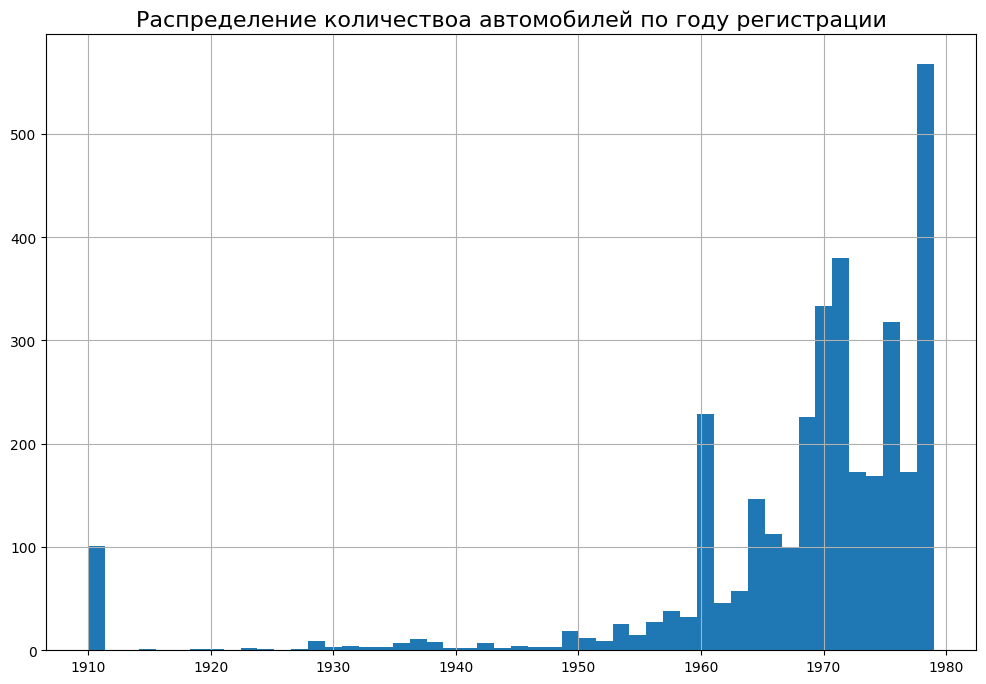

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(df.query('1980 > RegistrationYear >= 1910')[['RegistrationYear']], bins=50)
plt.grid(True)
plt.title('Распределение количествоа автомобилей по году регистрации', fontsize=16)
plt.show()

После 60-го года их становится больше, и это больше похоже не правду.  
Избавимся от тех немногих что были ранее, и от 2066 года.

In [17]:
df = df.query('1959 < RegistrationYear < 2017')

Отнимем от года создания анкеты год регистрации авто, чтобы примерно воссоздать его возраст.

In [18]:
df.loc[:, 'YearsFromReg'] = (df['DateCreated'].dt.year).astype('int64') - df['RegistrationYear']
print(df['YearsFromReg'])

0         23
1          5
2         12
3         15
4          8
          ..
354360    11
354361    11
354362    16
354363    20
354364    14
Name: YearsFromReg, Length: 339413, dtype: int64


Есть ли автомобили которые выставили на продажу за несколько лет до постановки на учет? Если да, то вероятно это ошибка в данных.

In [19]:
df.query('YearsFromReg < 0')[['RegistrationYear', 'DateCreated', 'YearsFromReg']]

,RegistrationYear,DateCreated,YearsFromReg


Успешно.  
Что же с пробегом?

In [22]:
df['Kilometer'].value_counts()

150000    227546
125000     35037
100000     14375
90000      11184
80000       9747
70000       8351
60000       7272
50000       6051
5000        5809
40000       4811
30000       4308
20000       3801
10000       1121
Name: Kilometer, dtype: int64

Тут все довольно правдоподобно.  
Мощность?

In [23]:
df['Power'].describe(percentiles=[.01, .05, .1, .11, .12, .9, .95, .99, .995])

count    339413.000000
mean        111.074809
std         186.926210
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
11%          34.000000
12%          45.000000
50%         105.000000
90%         180.000000
95%         218.000000
99%         300.000000
99.5%       334.000000
max       20000.000000
Name: Power, dtype: float64

11% нулевых значений и до 20000 лошадиных сил... Любопытно. Посмотрим у кого более 400 л.с.

In [24]:
df.query('Power > 400')[['Power', 'Kilometer', 'Price', 'Model', 'Brand', 'RegistrationYear']]

,Power,Kilometer,Price,Model,Brand,RegistrationYear
1816,1398,5000,3200,corolla,toyota,2004
2102,1799,150000,0,vectra,opel,1999
2781,450,125000,19500,cayenne,porsche,2004
3289,476,150000,16899,e_klasse,mercedes_benz,2003
4060,953,150000,3100,colt,mitsubishi,2005
...,...,...,...,...,...,...
352318,435,150000,15999,other,audi,2007
353629,650,150000,2400,c2,citroen,2007
354041,476,125000,20000,other,mercedes_benz,2006
354256,1103,150000,399,3er,bmw,1994


Тойота королла с 1398 л.с. за 3200 евро. Впечатляет. В то время как более 400 л.с. у дорогих Мерседесов или БМВ - похоже не правду. Избавимся от слишком больших значений.

In [25]:
df = df.query('Power < 500')

А нулевые заполним средними значениями для данной модели и бренда.

In [26]:
df = df.merge(df.groupby(['Brand', 'Model'], as_index=False)\
                .agg(avg_power=('Power', 'mean'))\
                .astype({'avg_power': 'int64'}), 
              on=['Brand', 'Model'], 
              how='left')

df['Power'] = df.apply(lambda x: x['Power'] if x['Power'] > 0 else x['avg_power'], axis=1)
df = df.drop(columns=['avg_power'])

Что получилось?

In [27]:
df['Power'].describe(percentiles=[.01, .05, .1, .11, .12, .9, .95, .99, .995])

count    333499.000000
mean        118.475834
std          52.614309
min           0.000000
1%           45.000000
5%           54.000000
10%          60.000000
11%          60.000000
12%          60.000000
50%         110.000000
90%         184.000000
95%         218.000000
99%         298.000000
99.5%       326.000000
max         490.000000
Name: Power, dtype: float64

Несколько нулевых значений всё-таки осталось. Уберем их из датафрейма.

In [28]:
df = df.query('Power > 0')

А что с целевым признаком?

In [29]:
df['Price'].describe(percentiles=[.01, .02, .03, .04, .05, .1])

count    333497.000000
mean       4514.373868
std        4549.110905
min           0.000000
1%            0.000000
2%            0.000000
3%           35.000000
4%          150.000000
5%          220.000000
10%         500.000000
50%        2800.000000
max       20000.000000
Name: Price, dtype: float64

Есть нули, и даже единицы. Что за авто за 1 евро?

In [30]:
df.query('0 < Price < 50').sort_values('Price', ascending=False)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,YearsFromReg
261396,2016-03-19 09:54:53,49,small,1999,NaN,58.0,polo,100000,0,NaN,volkswagen,NaN,2016-03-19,0,6528,2016-04-06 10:15:49,17
299464,2016-03-16 17:38:47,49,small,1995,manual,70.0,polo,150000,6,petrol,volkswagen,NaN,2016-03-16,0,83139,2016-04-06 23:16:50,21
6982,2016-03-11 12:48:57,49,NaN,1995,NaN,120.0,passat,150000,0,NaN,volkswagen,NaN,2016-03-11,0,45665,2016-04-07 06:45:12,21
271885,2016-03-28 23:51:55,49,coupe,2015,auto,430.0,m_reihe,5000,1,petrol,bmw,NaN,2016-03-28,0,63457,2016-03-29 07:42:18,1
123984,2016-03-14 15:37:39,49,NaN,1980,NaN,95.0,transporter,10000,0,NaN,volkswagen,NaN,2016-03-14,0,22885,2016-03-23 15:47:53,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139997,2016-03-22 10:52:12,1,small,1999,NaN,44.0,cuore,100000,5,petrol,daihatsu,NaN,2016-03-22,0,58640,2016-04-05 23:17:20,17
140777,2016-03-24 02:36:18,1,NaN,1995,manual,109.0,vectra,5000,0,NaN,opel,NaN,2016-03-24,0,47055,2016-03-30 07:44:54,21
140820,2016-03-14 20:39:33,1,small,2005,manual,68.0,c2,150000,12,gasoline,citroen,yes,2016-03-14,0,45475,2016-04-06 07:44:30,11
140901,2016-03-30 10:37:14,1,NaN,2000,auto,231.0,5er,150000,0,NaN,bmw,NaN,2016-03-30,0,55131,2016-04-06 20:18:15,16


BMW 5 серии 2016 года за 1 евро. Я бы купил.  
Посмотрим на распределение признака.

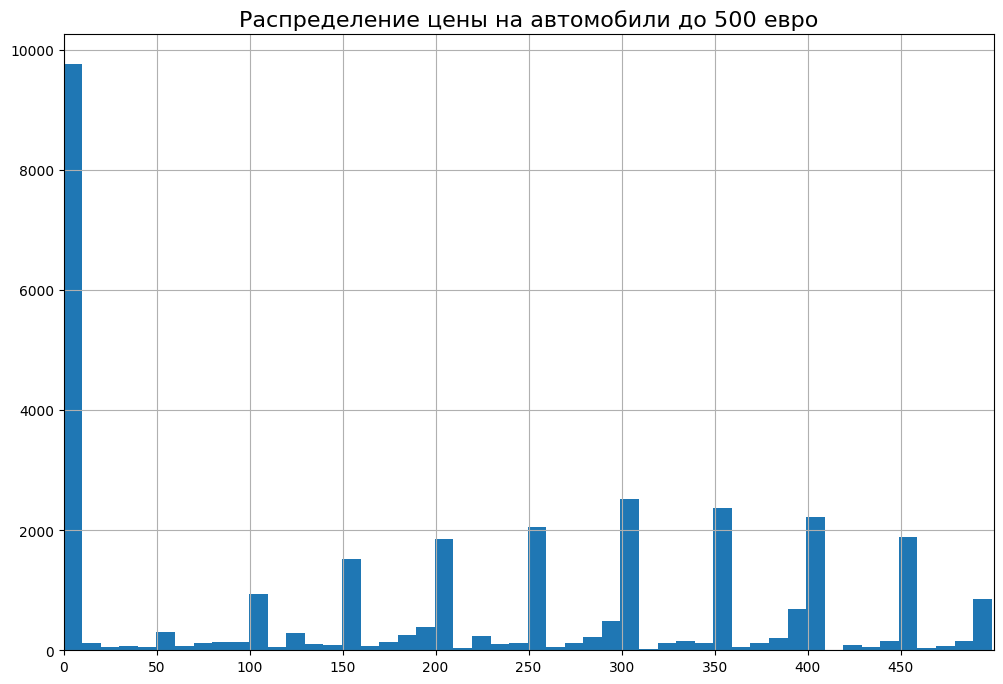

In [31]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['Price'] < 500]['Price'], bins=50)
plt.xlim(0, 500)
plt.xticks([i for i in range(0, 500, 50)])
plt.title('Распределение цены на автомобили до 500 евро', fontsize=16)
plt.grid(True)
plt.show()

Поскольку Price это целевая переменная, которую мы хотим прогнозировать, заполнять нули условным средним будет не очень рационально. Уберем низкие значения цены как некорректные

In [32]:
df = df.query('Price > 100')

Отберем другие категориальные признаки, которые нам могут быть важны, и посмотрим как много значений в них содержится.

In [33]:
list_cat = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

for column in list_cat:

    print(column, df[column].nunique())

VehicleType 8
Gearbox 2
Model 249
FuelType 7
Brand 40
Repaired 2


Сначала посмотрим какие значения у тех у кого их немного. 

In [34]:
list_cat = ['VehicleType', 'Gearbox', 'FuelType', 'Repaired']

for column in list_cat:

    print(column, '=', df[column].unique())

VehicleType = [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Gearbox = ['manual' 'auto' nan]
FuelType = ['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
Repaired = [nan 'yes' 'no']


Vehicle и Fuel - непоняно чем заполнять nan и что должно значить 'other'. По опыту - на стоимость авто гораздо сильнее влияет год выпуска и пробег, чем то седан это или купе.  

Посмотрим Brand.

In [35]:
df['Brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'hyundai', 'alfa_romeo', 'subaru',
       'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'citroen',
       'toyota', 'chevrolet', 'dacia', 'sonstige_autos', 'daihatsu',
       'chrysler', 'jaguar', 'daewoo', 'rover', 'porsche', 'saab',
       'trabant', 'land_rover', 'lada'], dtype=object)

И Model.

In [36]:
df['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'one', 'fortwo',
       '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta',
       'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'ka', 'a1', 'insignia',
       'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega', 'slk',
       '7er', '80', '147', '100', 'z_reihe', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'sharan', '6_reihe', 'c4', 'panda',
       'up', 'i_reihe', 'ceed', '5_reihe', 'yeti', 'octavia', 'zafira',
       'mii', 'rx_reihe', '6er', 'modus', 'fox', 'matiz', 'beetle', 'c1',
       'rio', 'to

Model и Brand отпадают, т.к. их слишком много, и непонятно чем заполнять пропуски в Model, а так же что значит 'other' а только лишь Brand не достаточно для влияния на цену. Попробуем ими пожертвовать.

Соберем те признаки, которые можно использовать в новый датафрейм.

In [37]:
df_new = df.loc[:, ['YearsFromReg', 'Gearbox', 'Power', 'Kilometer', 'Repaired', 'Price']].reset_index(drop=True)

Посмотрим сколько данных удалось сохранить от их изначального количества.

In [38]:
print('Потеряно данных = {:.1%}'.format(1 - (df_new.shape[0] / 354369)))

Потеряно данных = 9.2%


Не критично, но хотелось бы меньше.  
Теперь проверим признаки на корреляцию.

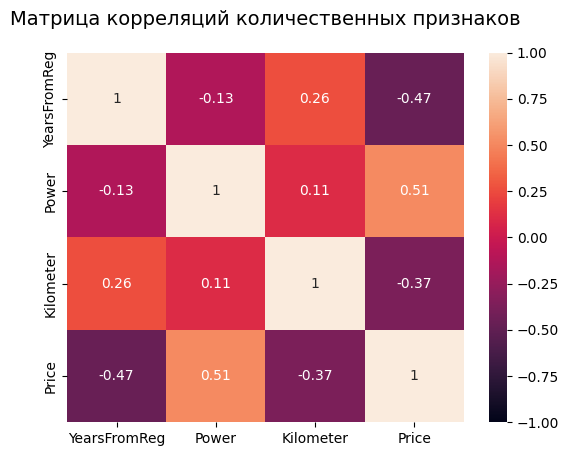

In [39]:
sns.heatmap(df_new.loc[:, ['YearsFromReg', 'Power', 'Kilometer', 'Price']].corr(), annot=True, vmax=1, vmin=-1)
plt.title('Матрица корреляций количественных признаков', pad=20, fontsize=14)
plt.show()

Всё в пределах нормы. Перейдем к обучению моделей.

### 2. Обучение модели

#### 2.1. Подготовка признаков

Создадим столбец целевых значений и матрицу признаков, а так же разобьём на тестовую, валидационную и обучающую выборки.

In [42]:
features = df_new.drop(columns=['Price'])
target = df_new['Price']

features_train, features_test_valid, target_train, target_test_valid = train_test_split(features, 
                                                                                        target, 
                                                                                        test_size=0.4, 
                                                                                        random_state=123)

features_valid, features_test, target_valid, target_test = train_test_split(features_test_valid, 
                                                                            target_test_valid, 
                                                                            test_size=0.5, 
                                                                            random_state=123)

print(features_train.shape, features_valid.shape, features_test.shape)

(193026, 5) (64342, 5) (64342, 5)


Преобразуем категориальные значения в количественные, создадим дамми-признаки.

In [43]:
features_train = features_train.reset_index(drop=True)
features_valid = features_valid.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)

ohe_gearbox = OneHotEncoder(handle_unknown='ignore')
ohe_repair = OneHotEncoder(handle_unknown='ignore')

dummy_gearbox_train = pd.DataFrame(ohe_gearbox.fit_transform(features_train[['Gearbox']]).toarray())\
                      .rename(columns={0: 'Gearbox_auto', 1: 'Gearbox_manual', 2: 'unknown'})\
                      .drop(columns=['unknown']).astype('int64')

dummy_repair_train = pd.DataFrame(ohe_repair.fit_transform(features_train[['Repaired']]).toarray())\
                .rename(columns={0: 'Repaired_no', 1: 'Repaired_yes', 2: 'unknown'})\
                .drop(columns=['unknown']).astype('int64')


dummy_gearbox_valid = pd.DataFrame(ohe_gearbox.transform(features_valid[['Gearbox']]).toarray())\
                      .rename(columns={0: 'Gearbox_auto', 1: 'Gearbox_manual', 2: 'unknown'})\
                      .drop(columns=['unknown']).astype('int64')

dummy_repair_valid = pd.DataFrame(ohe_repair.transform(features_valid[['Repaired']]).toarray())\
                .rename(columns={0: 'Repaired_no', 1: 'Repaired_yes', 2: 'unknown'})\
                .drop(columns=['unknown']).astype('int64')


dummy_gearbox_test = pd.DataFrame(ohe_gearbox.transform(features_test[['Gearbox']]).toarray())\
                      .rename(columns={0: 'Gearbox_auto', 1: 'Gearbox_manual', 2: 'unknown'})\
                      .drop(columns=['unknown']).astype('int64')

dummy_repair_test = pd.DataFrame(ohe_repair.transform(features_test[['Repaired']]).toarray())\
                .rename(columns={0: 'Repaired_no', 1: 'Repaired_yes', 2: 'unknown'})\
                .drop(columns=['unknown']).astype('int64')


features_train = features_train.join(dummy_gearbox_train)
features_train = features_train.join(dummy_repair_train)
features_train = features_train.drop(columns=['Gearbox', 'Repaired'])

features_valid = features_valid.join(dummy_gearbox_valid)
features_valid = features_valid.join(dummy_repair_valid)
features_valid = features_valid.drop(columns=['Gearbox', 'Repaired'])

features_test = features_test.join(dummy_gearbox_test)
features_test = features_test.join(dummy_repair_test)
features_test = features_test.drop(columns=['Gearbox', 'Repaired'])

Так же создадим объединенный датафрейм обучающей и валидационной выборки для лучшего обучения подходящей модели.

In [44]:
features_union = pd.concat([features_train, features_valid])
target_union = pd.concat([target_train, target_valid])

#### 2.2. Поиск оптимальной модели линейной регрессии

Подберем оптимальные параметры решающего дерева.

In [45]:
%%time
best_depth_dt = None
best_rmse_dt = 1000000

for depth in range(1, 16):

    model_dt = DecisionTreeRegressor(max_depth=depth, random_state=123)
    model_dt.fit(features_train, target_train)
    dt_rmse = mean_squared_error(y_pred=model_dt.predict(features_valid), y_true=target_valid, squared=False)

    if dt_rmse < best_rmse_dt:
        best_rmse_dt = dt_rmse
        best_depth_dt = depth

print('RMSE DecisionTree =', best_rmse_dt)

RMSE DecisionTree = 2053.8359471101867
CPU times: user 2.08 s, sys: 54.7 ms, total: 2.14 s
Wall time: 2.16 s


Теперь обучим его на них.

In [46]:
%%time 
model_dt = DecisionTreeRegressor(max_depth=best_depth_dt, random_state=123)
model_dt.fit(features_train, target_train)
print('Complete')

Complete
CPU times: user 186 ms, sys: 4.32 ms, total: 191 ms
Wall time: 190 ms


Подберем оптимальные гиперпараметры для градиентного бустинга модели XGBoost, уменьшим learning_rate с 0.3 до 0.1, для большей точности.

In [47]:
%%time 
best_ests = None 
best_depth_xgb = None
best_rmse_xgb = 1000000

for est in range(10, 101, 10):

    for depth in range(2, 16):

        model_xgb = XGBRegressor(n_estimators=est, max_depth=depth, learning_rate=0.1, n_jobs=-1)
        model_xgb.fit(features_train, target_train)
        rmse_xgb = mean_squared_error(y_pred=model_xgb.predict(features_valid), y_true=target_valid, squared=False)

        if rmse_xgb < best_rmse_xgb:
            best_rmse_xgb = rmse_xgb
            best_ests = est 
            best_depth_xgb = depth

print('RMSE XGBoost = {:.0f}'.format(best_rmse_xgb))

RMSE XGBoost = 1930
CPU times: user 37min 47s, sys: 7min 34s, total: 45min 22s
Wall time: 8min


In [48]:
print(f'Характеристики лучшей модели XGBoost: n_estimators = {best_ests}, max_depth = {best_depth_xgb}')

Характеристики лучшей модели XGBoost: n_estimators = 100, max_depth = 10


Обучим градиентный бустинг с этими параметрами.

In [49]:
%%time
model_xgb = XGBRegressor(n_estimators=best_ests, learning_rate=0.1, max_depth=best_depth_xgb, n_jobs=-1)
model_xgb.fit(features_train, target_train)
print('Complete')

Complete
CPU times: user 36.2 s, sys: 6.39 s, total: 42.6 s
Wall time: 6.51 s


In [50]:
%%time
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, n_jobs=-1)
model_xgb.fit(features_train, target_train)
print('Complete')

Complete
CPU times: user 35.3 s, sys: 6.28 s, total: 41.6 s
Wall time: 6.92 s


Обе модели уложились в поставленные условия метрики качества. У меня модель градиентного бустинга обучается 5.5 секунд против 200 миллисекунд решающего дерева. Метрика качества RMSE показывает меньшую ошибку, примерно на 130 евро. поскольку 5 секунд хоть и больше 200 миллисекунд, но все равно очень мало, я выбираю бустинг.

Для сравнения проверим результат на константной модели со средними значениями.

In [51]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(features_train, target_train)
print('RMSE DummyRegressor (mean) =', 
      mean_squared_error(y_pred=model_dummy.predict(features_valid), 
                         y_true=target_valid, 
                         squared=False))

RMSE DummyRegressor (mean) = 4520.585053366933


Константная модель предсказуемо гораздо хуже.

#### 2.3. Проверка оптимальной модели на тестовых данных

Обучим градиентный бустинг на объединенном датафрейме.

In [52]:
%%time
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, n_jobs=-1)
model_xgb.fit(features_union, target_union)
print('Complete')

Complete
CPU times: user 48 s, sys: 8.19 s, total: 56.2 s
Wall time: 8.82 s


И проверим на тестовых данных.

In [53]:
print('RMSE =', mean_squared_error(y_pred=model_xgb.predict(features_test), 
                                   y_true=target_test, 
                                   squared=False))

RMSE = 1936.3300308385174


### 3. Выводы

- Есть множество пропусков, неопределенностей и артефактов в предоставленых данных. Однако несмотря на "отбрасывание" большого количества таких признаков, факт того, что метрики качества остались в рамках допустимой нормы, делаю вывод, что ключевые признаки удалось сохранить.  
- Модель градиентного бустинга XGBoost показала лучший результат на метрике качества чем решающее дерево для линейной регрессии, хоть и обучалась дольше. Поэтому для тестовых данных решил использовать именно её.  
- Поиск оптимальных гиперпараметров модели бустинга занимает существенно больше времени, и целесообразность его использования зависит от имеющихся вычислительных мощностей и объема данных для обучения модели. В данном случае модель имела право на использование, т.к. ее применение не заняло слишком много времени.  
- Обе модели - и градиентный бустинг и решающее дерево "уложились" в требования задачи по минимальному порогу RMSE. Градиентный бустинг 1930, решающее дерево 2053.  
- Обе модели показали результат более чем в 2 раза превосходящий константную модель (4520).  
- Модель градиентного бустинга показала значение метрики RMSE 1936 на тестовой выборке.